In [ ]:
import numpy as np


In [ ]:
a = np.array([[12, 34, 56, 33, 47],
              [75, 54, 57, 63, 22],
              [11, 12, 13, 14, 15],
              [67, 59, 68, 89, 80],
              [90, 91, 99, 23, 27]])

In [ ]:

b=a
for i in range(len(a)):
    for j in range(len(a[i])):
        if b[i][j]%2==0:
            b[i][j]=-1
print(b)

[[-1 -1 -1 33 47]
 [75 -1 57 63 -1]
 [11 -1 13 -1 15]
 [67 59 -1 89 -1]
 [-1 91 99 23 27]]


In [ ]:
sum = 0
mean = 0
for i in range(5):
    for j in range(len(a[i])):
      sum = sum + a[i][j]
      mean = sum/len(a[i])
print(sum)
print(mean)

759
151.8


In [ ]:
flattened_a = a.flatten()
sorted_a_descending = np.sort(flattened_a)[::-1]
print(sorted_a_descending)

[99 91 89 75 67 63 59 57 47 33 27 23 15 13 11 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1]


Question 2

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:

display(df[['math score', 'reading score', 'writing score']].describe())

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df['Overall_Score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Overall_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
def get_result(row):
    if row['math score'] >= 40 and row['reading score'] >= 40 and row['writing score'] >= 40:
        return 'Pass'
    else:
        return 'Fail'

df['Result'] = df.apply(get_result, axis=1)
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Overall_Score,Result
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Pass
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass


In [ ]:

group_scores = df.groupby(['gender', 'parental level of education'])[['math score', 'reading score', 'writing score', 'Overall_Score']].mean()
display(group_scores)


math score  reading score  writing score  \
gender parental level of education                                             
female associate's degree            65.250000      74.120690      74.000000   
       bachelor's degree             68.349206      77.285714      78.380952   
       high school                   59.351064      68.202128      66.691489   
       master's degree               66.500000      76.805556      77.638889   
       some college                  65.406780      73.550847      74.050847   
       some high school              59.296703      69.109890      68.285714   
male   associate's degree            70.764151      67.433962      65.405660   
       bachelor's degree             70.581818      68.090909      67.654545   
       high school                   64.705882      61.480392      58.539216   
       master's degree               74.826087      73.130435      72.608696   
       some college                  69.009259      64.990741      63.148148   
       some high school              67.840909      64.693182      61.375000   

                                    Overall_Score  
gender parental level of education                 
female associate's degree               71.123563  
       bachelor's degree                74.671958  
       high school                      64.748227  
       master's degree                  73.648148  
       some college                     71.002825  
       some high school                 65.564103  
male   associate's degree               67.867925  
       bachelor's degree                68.775758  
       high school                      61.575163  
       master's degree                  73.521739  
       some college                     65.716049  
       some high school                 64.636364

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


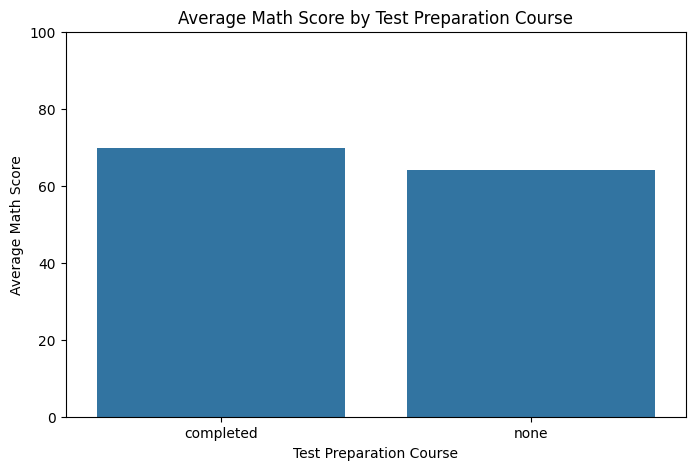

In [ ]:

avg_math_score_by_prep = (
    df.groupby('test preparation course')['math score']
      .mean()
      .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='test preparation course',
    y='math score',
    data=avg_math_score_by_prep
)
plt.title('Average Math Score by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Math Score')
plt.ylim(0, 100)
plt.show()


Question 3


In [ ]:
import numpy as np
from scipy.linalg import solve


A = np.array([[3, 2],[4, -1]])

b = np.array([16, 9])

x = solve(A, b)

print("Solution for x and y:")
print(x)


Solution for x and y:
[3.09090909 3.36363636]


Part 2


In [ ]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
f = lambda x: (x - 3)**2 + 2


Optimized value of x: 3.0000000283269603
Minimum value of function: 2.000000000000001


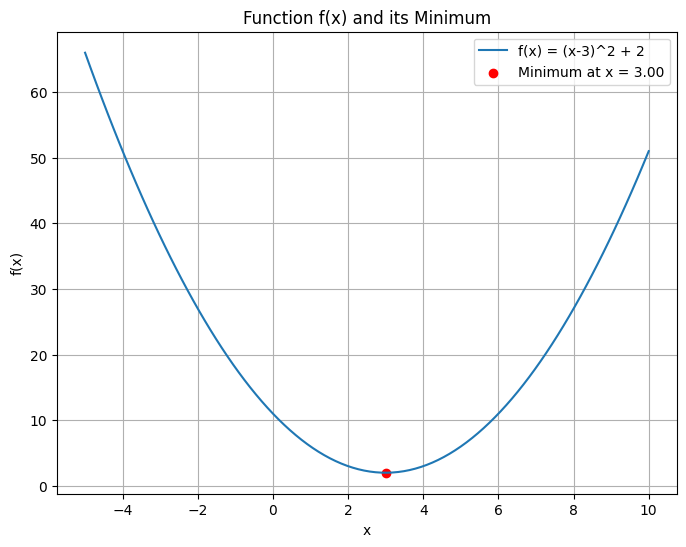

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the function to minimize
f = lambda x: (x - 3)**2 + 2

# Minimize
initial_guess = 0
result = minimize(f, initial_guess)

optimized_x = result.x[0]
print("Optimized value of x:", optimized_x)
print("Minimum value of function:", result.fun)

# Plotting
x_values = np.linspace(-5, 10, 100)
y_values = f(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='f(x) = (x-3)^2 + 2')
plt.scatter(optimized_x, f(optimized_x), color='red', label=f'Minimum at x = {optimized_x:.2f}')
plt.title('Function f(x) and its Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Question 4


In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
iris = load_iris()
print(iris.keys())
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Training data shape: (105, 4)
Testing data shape: (45, 4)


In [ ]:
logistic_regression_model = LogisticRegression(max_iter=200) # Increased max_iter for potential convergence issues
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred_lr = logistic_regression_model.predict(X_test)
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Evaluation:
Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier      # ← add this line
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------- Logistic Regression ----------
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_lr = log_model.predict(X_test)

print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# ---------- k‑Nearest Neighbors ----------
knn_model = KNeighborsClassifier(n_neighbors=5)   # you can change n_neighbors as needed
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("\nKNN Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Logistic Regression Evaluation:
Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


KNN Evaluation:
Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        4